## DATA LOADING AND PREPROCESSING

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/bhudi/Downloads/Language Detection.csv")

In [3]:
df.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [7]:
df['Language'].value_counts()


English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

In [8]:
counts = df["Language"].value_counts().reset_index()
counts.columns = ["Language", "Count"]

<Axes: xlabel='Count', ylabel='Language'>

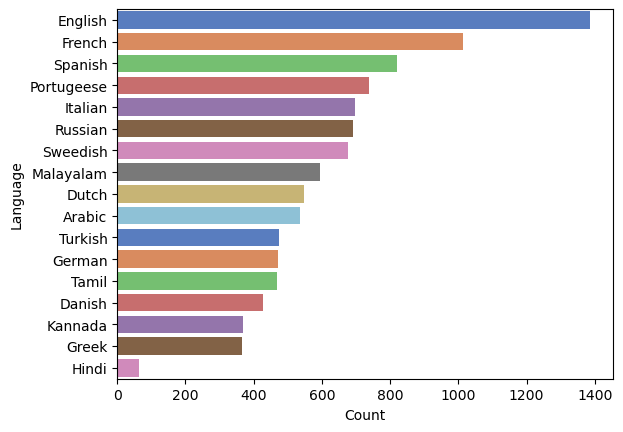

In [12]:
sns.barplot(x='Count', y='Language', data=counts, palette='muted')

## DATA TRANSFORMATION

In [47]:
from sklearn.model_selection import train_test_split
train_texts, test_texts, train_labels, test_labels = train_test_split(df['Text'], df['Language'], test_size=0.2, random_state=101)

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x_train=cv.fit_transform(train_texts)
x_test=cv.transform(test_texts)

In [49]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_train=le.fit_transform(train_labels)
y_test=le.transform(test_labels)

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [51]:
mod=Sequential()
mod.add(Dense(128,activation='relu',input_shape=(x_train.shape[1],)))
mod.add(Dense(64, activation='relu'))
mod.add(Dense(len(le.classes_), activation='softmax'))

In [52]:
mod.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [53]:
x_train, x_val, y_train, y_val=train_test_split(x_train,y_train,test_size=0.2,random_state=101)

In [54]:
import tensorflow as tf
from scipy.sparse import csr_matrix

In [55]:
x_train_sparse=tf.convert_to_tensor(csr_matrix(x_test).todense(), dtype=tf.float32)
x_val_sparse = tf.convert_to_tensor(csr_matrix(x_val).todense(), dtype=tf.float32)
x_test_sparse = tf.convert_to_tensor(csr_matrix(x_test).todense(), dtype=tf.float32)

In [60]:
mod.fit(x_train_sparse,y_test, epochs=10, batch_size=32, validation_data=(x_val_sparse, y_val))

Epoch 1/10
65/65 [==============================] - 3s 39ms/step - loss: 2.0687 - accuracy: 0.6349 - val_loss: 1.0925 - val_accuracy: 0.8785
Epoch 2/10
65/65 [==============================] - 2s 35ms/step - loss: 0.6065 - accuracy: 0.9545 - val_loss: 0.4563 - val_accuracy: 0.9426
Epoch 3/10
65/65 [==============================] - 2s 34ms/step - loss: 0.2379 - accuracy: 0.9753 - val_loss: 0.3251 - val_accuracy: 0.9504
Epoch 4/10
65/65 [==============================] - 2s 35ms/step - loss: 0.1369 - accuracy: 0.9869 - val_loss: 0.2767 - val_accuracy: 0.9480
Epoch 5/10
65/65 [==============================] - 2s 36ms/step - loss: 0.0940 - accuracy: 0.9894 - val_loss: 0.2532 - val_accuracy: 0.9480
Epoch 6/10
65/65 [==============================] - 2s 36ms/step - loss: 0.0716 - accuracy: 0.9894 - val_loss: 0.2398 - val_accuracy: 0.9462
Epoch 7/10
65/65 [==============================] - 2s 36ms/step - loss: 0.0586 - accuracy: 0.9903 - val_loss: 0.2346 - val_accuracy: 0.9383
Epoch 8/10
65

<Axes: >

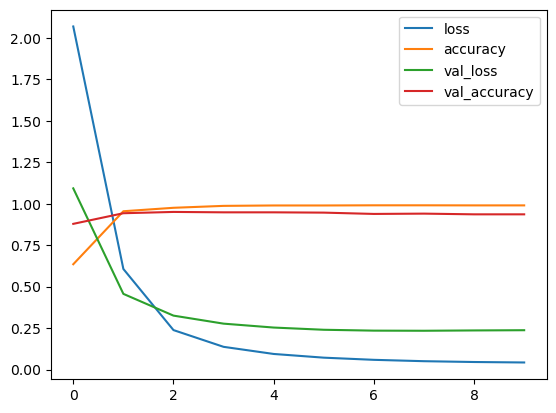

In [61]:
ll=pd.DataFrame(mod.history.history)
ll.plot()

In [64]:
from sklearn.metrics import accuracy_score

pred = mod.predict(x_test)
y_pred = pred.argmax(axis=1)
ac = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {ac * 100:.2f}%')

65/65 [==============================] - 0s 1ms/step
Test Accuracy: 98.89%


In [71]:
def predict_language(input_text):
    input_text = [input_text]
    input_vector = cv.transform(input_text)
    input_sparse = tf.convert_to_tensor(input_vector.todense(), dtype=tf.float32)

    predictions = mod.predict(input_sparse)

    predicted_label_index = np.argmax(predictions)
    predicted_language = le.classes_[predicted_label_index]

    return predicted_language

In [72]:
input_text = "Checking if this works"
predicted_language = predict_language(input_text)

print(f"The predicted language for '{input_text}' is: {predicted_language}")

1/1 [==============================] - 0s 50ms/step
The predicted language for 'Checking if this works' is: English


In [73]:
input_text = "ಚಾನೆಲ್ ಮತ್ತು ರಿಲಯನ್ಸ್ "
predicted_language = predict_language(input_text)

print(f"The predicted language for '{input_text}' is: {predicted_language}")

1/1 [==============================] - 0s 36ms/step
The predicted language for 'ಚಾನೆಲ್ ಮತ್ತು ರಿಲಯನ್ಸ್ ' is: Kannada


In [74]:
input_text = "Wie geht es dir"
predicted_language = predict_language(input_text)

print(f"The predicted language for '{input_text}' is: {predicted_language}")

1/1 [==============================] - 0s 80ms/step
The predicted language for 'Wie geht es dir' is: German


In [75]:
input_text = "как жизнь"
predicted_language = predict_language(input_text)

print(f"The predicted language for '{input_text}' is: {predicted_language}")

1/1 [==============================] - 0s 24ms/step
The predicted language for 'как жизнь' is: Russian


In [88]:
import tkinter as tk
from tkinter import messagebox
import joblib
import tensorflow as tf
import numpy as np

def predict_language(input_text):
    input_text = [input_text]
    input_vector = cv.transform(input_text)
    input_sparse = tf.convert_to_tensor(input_vector.todense(), dtype=tf.float32)

    predictions = mod.predict(input_sparse)

    predicted_label_index = np.argmax(predictions)
    predicted_language = le.classes_[predicted_label_index]

    return predicted_language

def on_predict_button_click():
    input_text = entry_text.get()
    if input_text:
        predicted_language = predict_language(input_text)
        result_label.config(text=f"The predicted language is: {predicted_language}")
    else:
        messagebox.showwarning("Input Error", "Please enter some text for prediction.")

window = tk.Tk()
window.title("Language Prediction GUI")
window.geometry('800x400')

label_instruction = tk.Label(window, text="Enter text to predict language:")
label_instruction.pack(pady=10)

entry_text = tk.Entry(window, width=80)
entry_text.pack(pady=10)

button_predict = tk.Button(window, text="Predict Language", command=on_predict_button_click, bg="green", fg="white")
button_predict.pack(pady=10)

result_label = tk.Label(window, text="", font=('Arial', 14))
result_label.pack(pady=10)

# Start the GUI event loop
window.mainloop()


1/1 [==============================] - 0s 23ms/step
